### BADASS Analysis: amino acids

##### Can we reduce the array of 48 barrels whilst maintaining model accuracy?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, confusion_matrix
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.utils.multiclass import unique_labels

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Large array amino acid data

In [3]:
l_aa_fluor_data = ParseArrayData(
    dir_path='/home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Paper_analysis/AAs/Large_array',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Paper_analysis/AAs/Large_array already found in /home/ks17361/array_sensing_env/array_sensing
Overwrite Paper_analysis/AAs/Large_array?y


Locate xlsx files

In [4]:
l_aa_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [5]:
l_aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/S_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/W_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/E_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/S_repeat_2.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/W_repeat_2.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/E_repeat_2.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Larg

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [6]:
l_aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: R, 8 (flagged readings = QLKEIA: 1.1058902102013586, NLKEIA: 0.6432415609183197, CCHex2: 0.44921957754392083, CCHept: 0.38990660557669954) 
 Outlier excluded from final output dataset: R, 6 (flagged readings = CCPent-I24K: 0.36275988972394413) 
 Outlier excluded from final output dataset: E, 3 (flagged readings = CCHept-I17A-L21A: 0.4913996193607859) 


In [7]:
l_aa_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   1.026325  1.053571     1.034778     1.010514     1.004756  0.943744   
1   1.014910  0.937853     0.930433     1.044855     0.979722  0.866931   
2   1.176067  1.006849     0.934257     1.019873     0.980434  0.928815   
3   0.968238  0.878641     0.837904     0.888387     0.931401  0.876360   
4   1.011632  0.712166     0.864056     0.987900     0.964710  0.818861   
5   0.989725  1.139130     0.873952     0.977018     0.918447  0.814248   
6   0.981264  1.000000     0.915024     1.019939     0.934679  0.832860   
7   0.982294  1.044248     0.879690     0.876849     0.931399  0.859980   
8   0.923840  1.520000     0.870054     0.854396     0.912125  0.795706   
9   1.042266  1.515723     0.886029     0.936381     0.949879  0.896599   
10  1.047779  2.000000     0.837868     1.015947     0.963729  0.910207   
11  0.991597  1.801587     0.662736     0.934360     0.852408  0.770376   
12  1.093379  1.730159     0.874666     1.048089     0.966698  0.982941   
13  1.081413  1.774390     1.068866     1.002002     0.983173  0.892411   
14  1.002247  1.598592     0.705118     0.940705     0.880726  0.744251   
15  1.072340  1.707692     0.693902     1.063752     0.897467  0.827298   
16  1.103635  1.832000     0.511031     1.113429     0.929349  0.640744   
17  1.060091  1.613095     0.716846     1.120461     0.956522  0.753939   
18  1.051879  0.905797     1.121725     1.098495     1.014482  0.942035   
19  1.149086  0.683616     0.934032     1.057975     0.934924  0.951269   
20  0.941075  0.780423     0.850063     0.971042     0.986674  0.783746   
21  1.010064  0.905797     0.887739     1.090656     0.945020  0.972455   
22  1.046074  1.068182     0.966707     0.995206     0.935573  0.802243   
23  0.981874  1.087838     1.009571     1.025349     0.937250  0.900656   
24  1.037135  1.000000     0.923944     0.972539     0.928397  0.886508   
25  0.965096  0.994536     0.990409     1.032959     0.949301  0.906921   
26  1.036483  0.880795     0.864968     1.047196     0.959202  0.906947   
27  1.012070  1.132075     1.048700     1.104314     0.981594  0.948993   
28  0.976109  0.850746     0.911490     0.960519     0.993028  0.949563   
29  1.172955  0.856322     0.968225     1.041973     0.970500  1.007900   
30  1.055407  0.858382     1.057894     1.067557     0.984581  0.936560   
31  1.033773  1.066079     0.997548     1.026339     0.945068  0.916875   
32  1.095672  1.024793     1.020617     1.061357     0.936312  0.942782   
33  1.001981  1.176471     0.935011     0.997896     0.916484  0.776465   
34  0.920046  0.851562     0.942115     0.968176     0.925701  0.927754   
35  0.878257  0.795620     0.935411     0.880725     0.875303  0.872184   
36  1.011153  0.992958     0.941305     0.888402     0.861906  0.918112   
37  1.046260  1.059459     0.943384     1.057794     0.971638  0.967880   
38  1.014316  0.854331     0.909236     0.917590     0.947695  0.990762   
39  1.015829  1.126374     0.996728     0.998135     0.963210  0.869580   
40  0.979676  0.954023     0.918322     0.922812     0.931199  0.930238   
41  1.025877  1.041667     0.925442     1.015227     1.000965  0.839242   
42  0.895242  0.786667     0.936800     0.814494     0.901722  0.918179   
43  1.041915  1.138614     0.960142     0.909119     0.947007  0.806508   
44  1.030931  1.311475     0.920490     0.989673     0.881294  0.964213   
45  1.009954  1.144509     1.077996     1.026483     0.999738  0.940467   
46  0.882853  0.579439     0.939586     0.939522     0.853172  0.911123   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   1.020925  0.959427     1.004524     1.008347  ...          0.807070   
1   0.960059  0.924038     1.011650     1.078104  ...          0.879224   
2   1.055619  0.931324     1.066850     1.009037  ...          0.850430   
3   0.963258  0.816671     0.912440     0.923009  ...          0.911353   
4   0.919994  0.902752     0.9

In [8]:
l_aa_df = l_aa_fluor_data.ml_fluor_data

Generates "representative" fingerprint for each class (by calculating the median value for each feature)

R


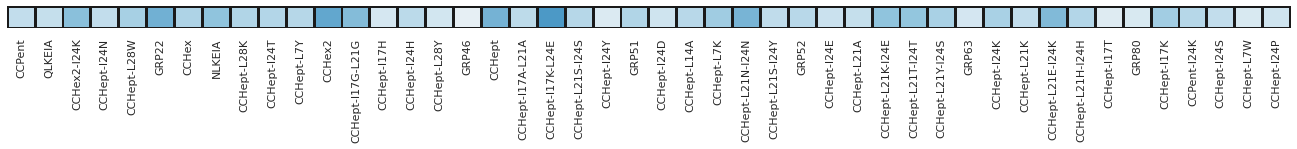

W


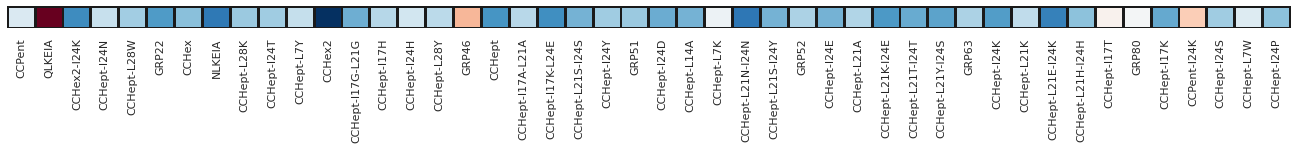

V


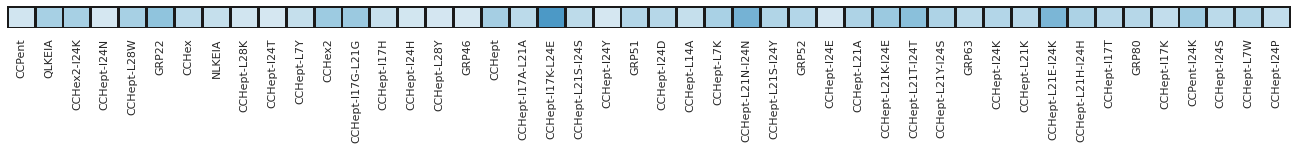

E


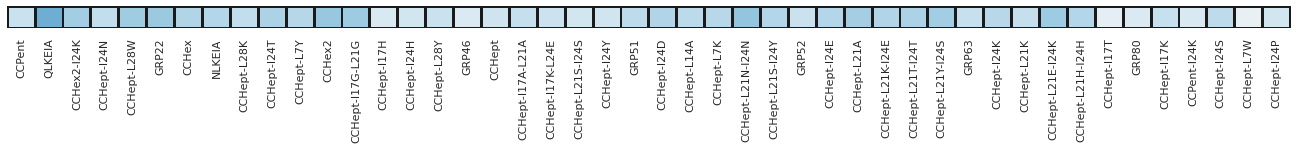

S


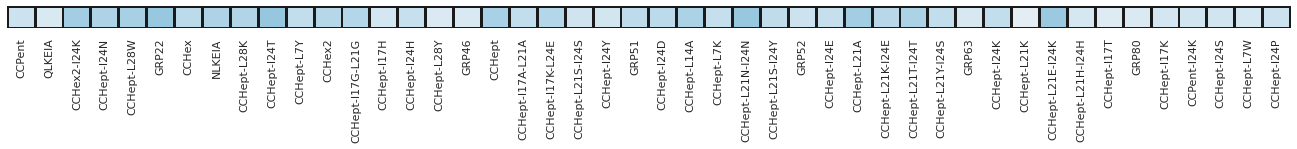

In [9]:
classes = []
for class_name in l_aa_df['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)

l_aa_df_x_val = l_aa_df.drop(['Analyte'], axis=1)
class_median_x_val = []
for class_name in classes:
    class_indices = [n for n in range(l_aa_df.shape[0]) if l_aa_df['Analyte'][n] == class_name]
    class_median_x_val.append(np.median(l_aa_df_x_val.values[class_indices, :], axis=0))

vmin = np.amin(class_median_x_val)
vmax = np.amax(class_median_x_val)

for index, class_name in enumerate(classes):
    print(class_name)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([class_median_x_val[index]]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_aa_df_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.savefig('{}/{}_median_barrel_readings_heatmap.svg'.format(l_aa_fluor_data.results_dir, class_name))
    plt.show()

Generates box plots to compare the distribution of values for each class across the 46 features

Glutamate


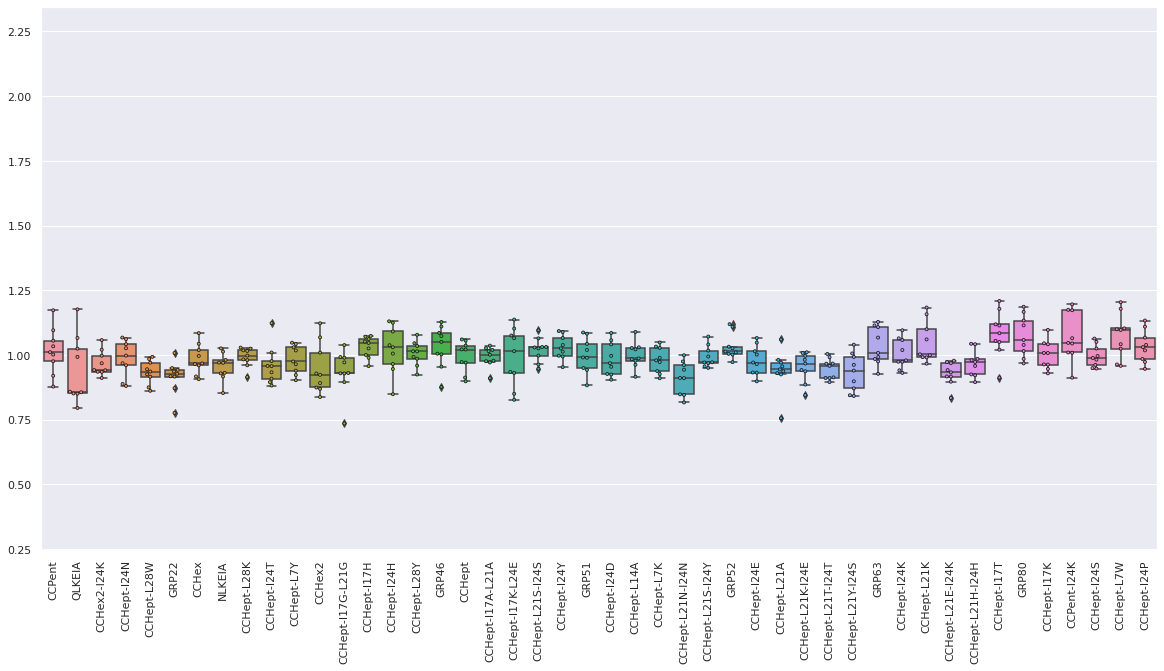

Arginine


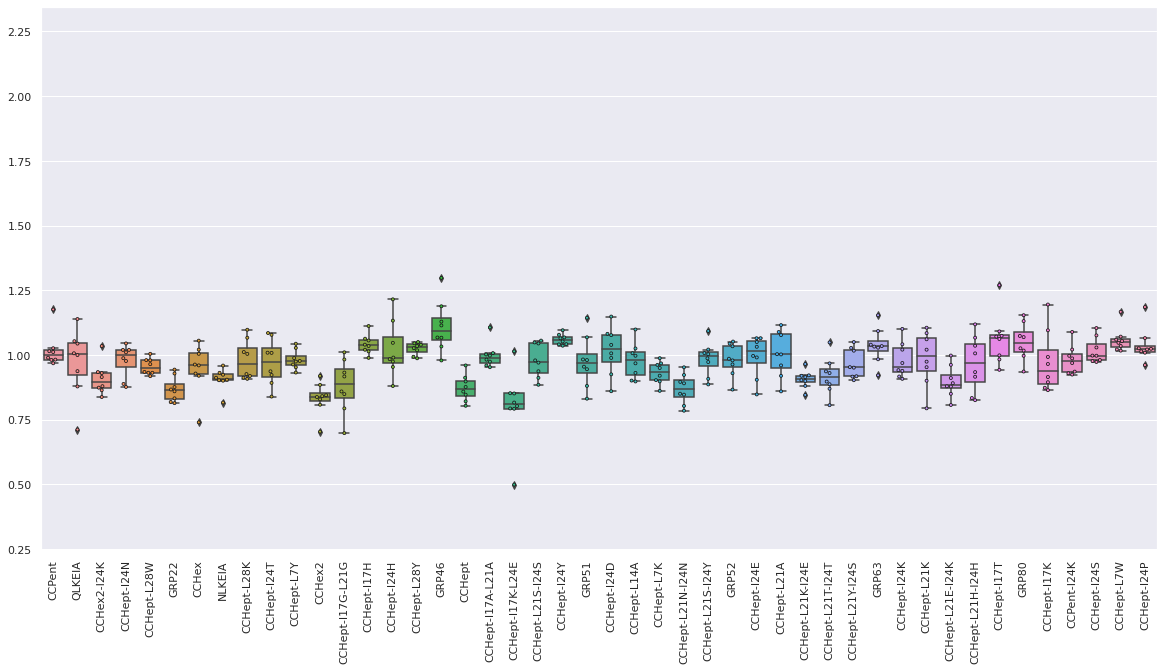

Serine


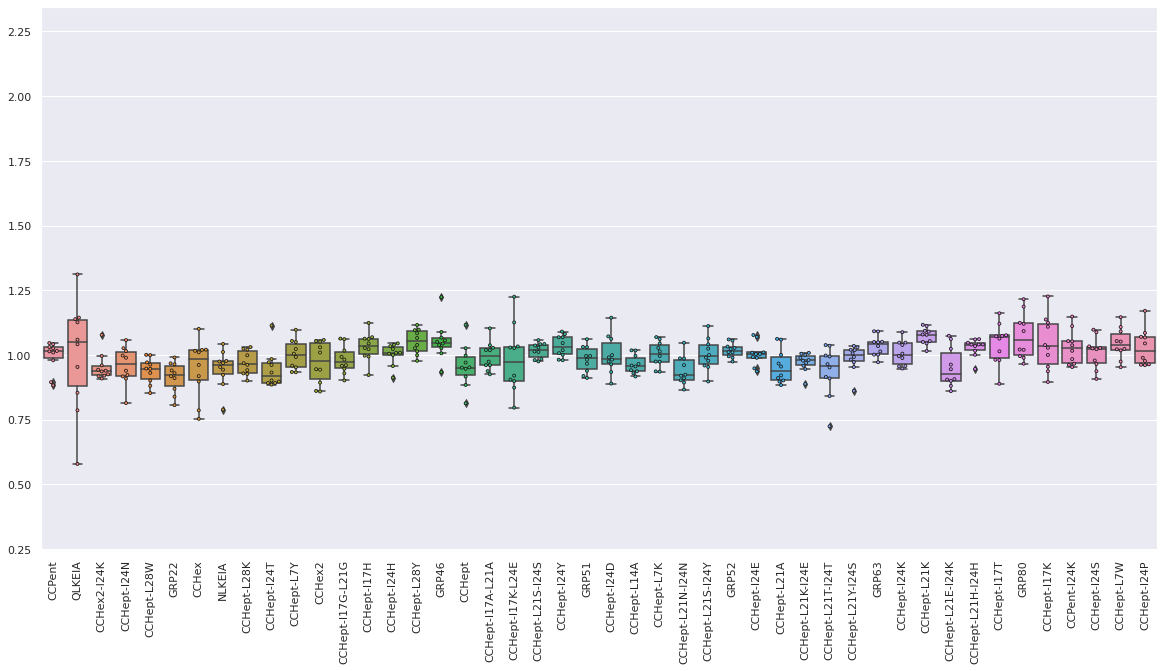

Tryptophan


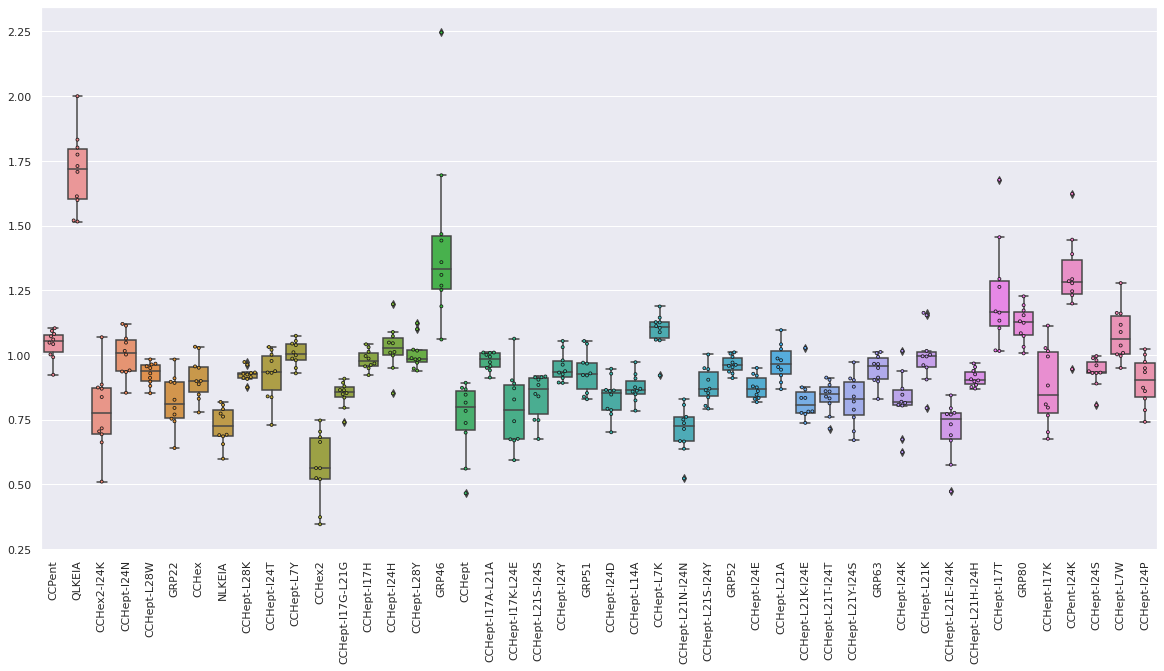

Valine


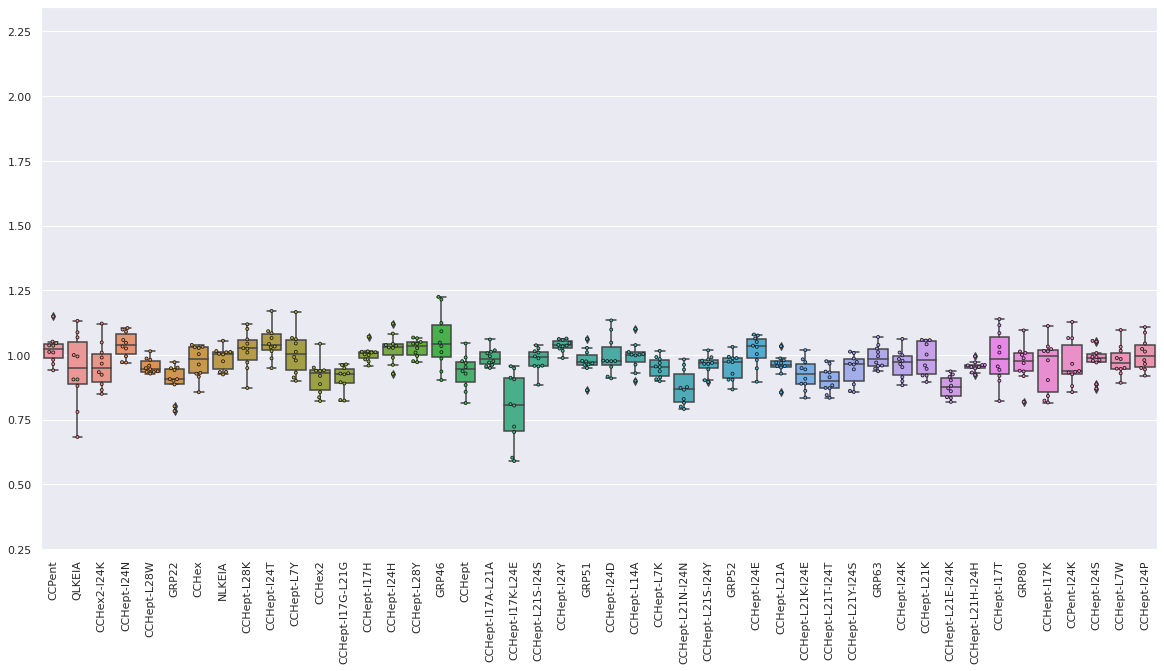

In [10]:
ymin = l_aa_df.drop('Analyte', axis=1).min().min() - 0.1
ymax = l_aa_df.drop('Analyte', axis=1).max().max() + 0.1

e_indices = [int(i) for i in range(l_aa_df.shape[0]) if l_aa_df['Analyte'][i] == 'E']
r_indices = [int(i) for i in range(l_aa_df.shape[0]) if l_aa_df['Analyte'][i] == 'R']
s_indices = [int(i) for i in range(l_aa_df.shape[0]) if l_aa_df['Analyte'][i] == 'S']
w_indices = [int(i) for i in range(l_aa_df.shape[0]) if l_aa_df['Analyte'][i] == 'W']
v_indices = [int(i) for i in range(l_aa_df.shape[0]) if l_aa_df['Analyte'][i] == 'V']

sns.set(rc={'figure.figsize':(20,10)})
print('Glutamate')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_df.iloc[e_indices])
sns.swarmplot(data=l_aa_df.iloc[e_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Glutamate_barrel_readings_boxplot.svg'.format(l_aa_fluor_data.results_dir))
plt.show()

print('Arginine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_df.iloc[r_indices])
sns.swarmplot(data=l_aa_df.iloc[r_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Arginine_barrel_readings_boxplot.svg'.format(l_aa_fluor_data.results_dir))
plt.show()

print('Serine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_df.iloc[s_indices])
sns.swarmplot(data=l_aa_df.iloc[s_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Serine_barrel_readings_boxplot.svg'.format(l_aa_fluor_data.results_dir))
plt.show()

print('Tryptophan')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_df.iloc[w_indices])
sns.swarmplot(data=l_aa_df.iloc[w_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Tryptophan_barrel_readings_boxplot.svg'.format(l_aa_fluor_data.results_dir))
plt.show()

print('Valine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_df.iloc[v_indices])
sns.swarmplot(data=l_aa_df.iloc[v_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Valine_barrel_readings_boxplot.svg'.format(l_aa_fluor_data.results_dir))
plt.show()

#### Run machine learning

In [11]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size
ml = RunML(
    results_dir='/home/ks17361/array_sensing_env/array_sensing/Paper_analysis/AAs/Large_array_ML_results/',
    fluor_data=l_aa_df
)

Directory /home/ks17361/array_sensing_env/array_sensing/Paper_analysis/AAs/Large_array_ML_results/ already found in /home/ks17361/array_sensing_env/array_sensing
Overwrite /home/ks17361/array_sensing_env/array_sensing/Paper_analysis/AAs/Large_array_ML_results/?y


In [12]:
ml.split_train_test_data(randomise=True, percent_test=0, test_analytes=[])

- Visualise correlation between the initial 46 features

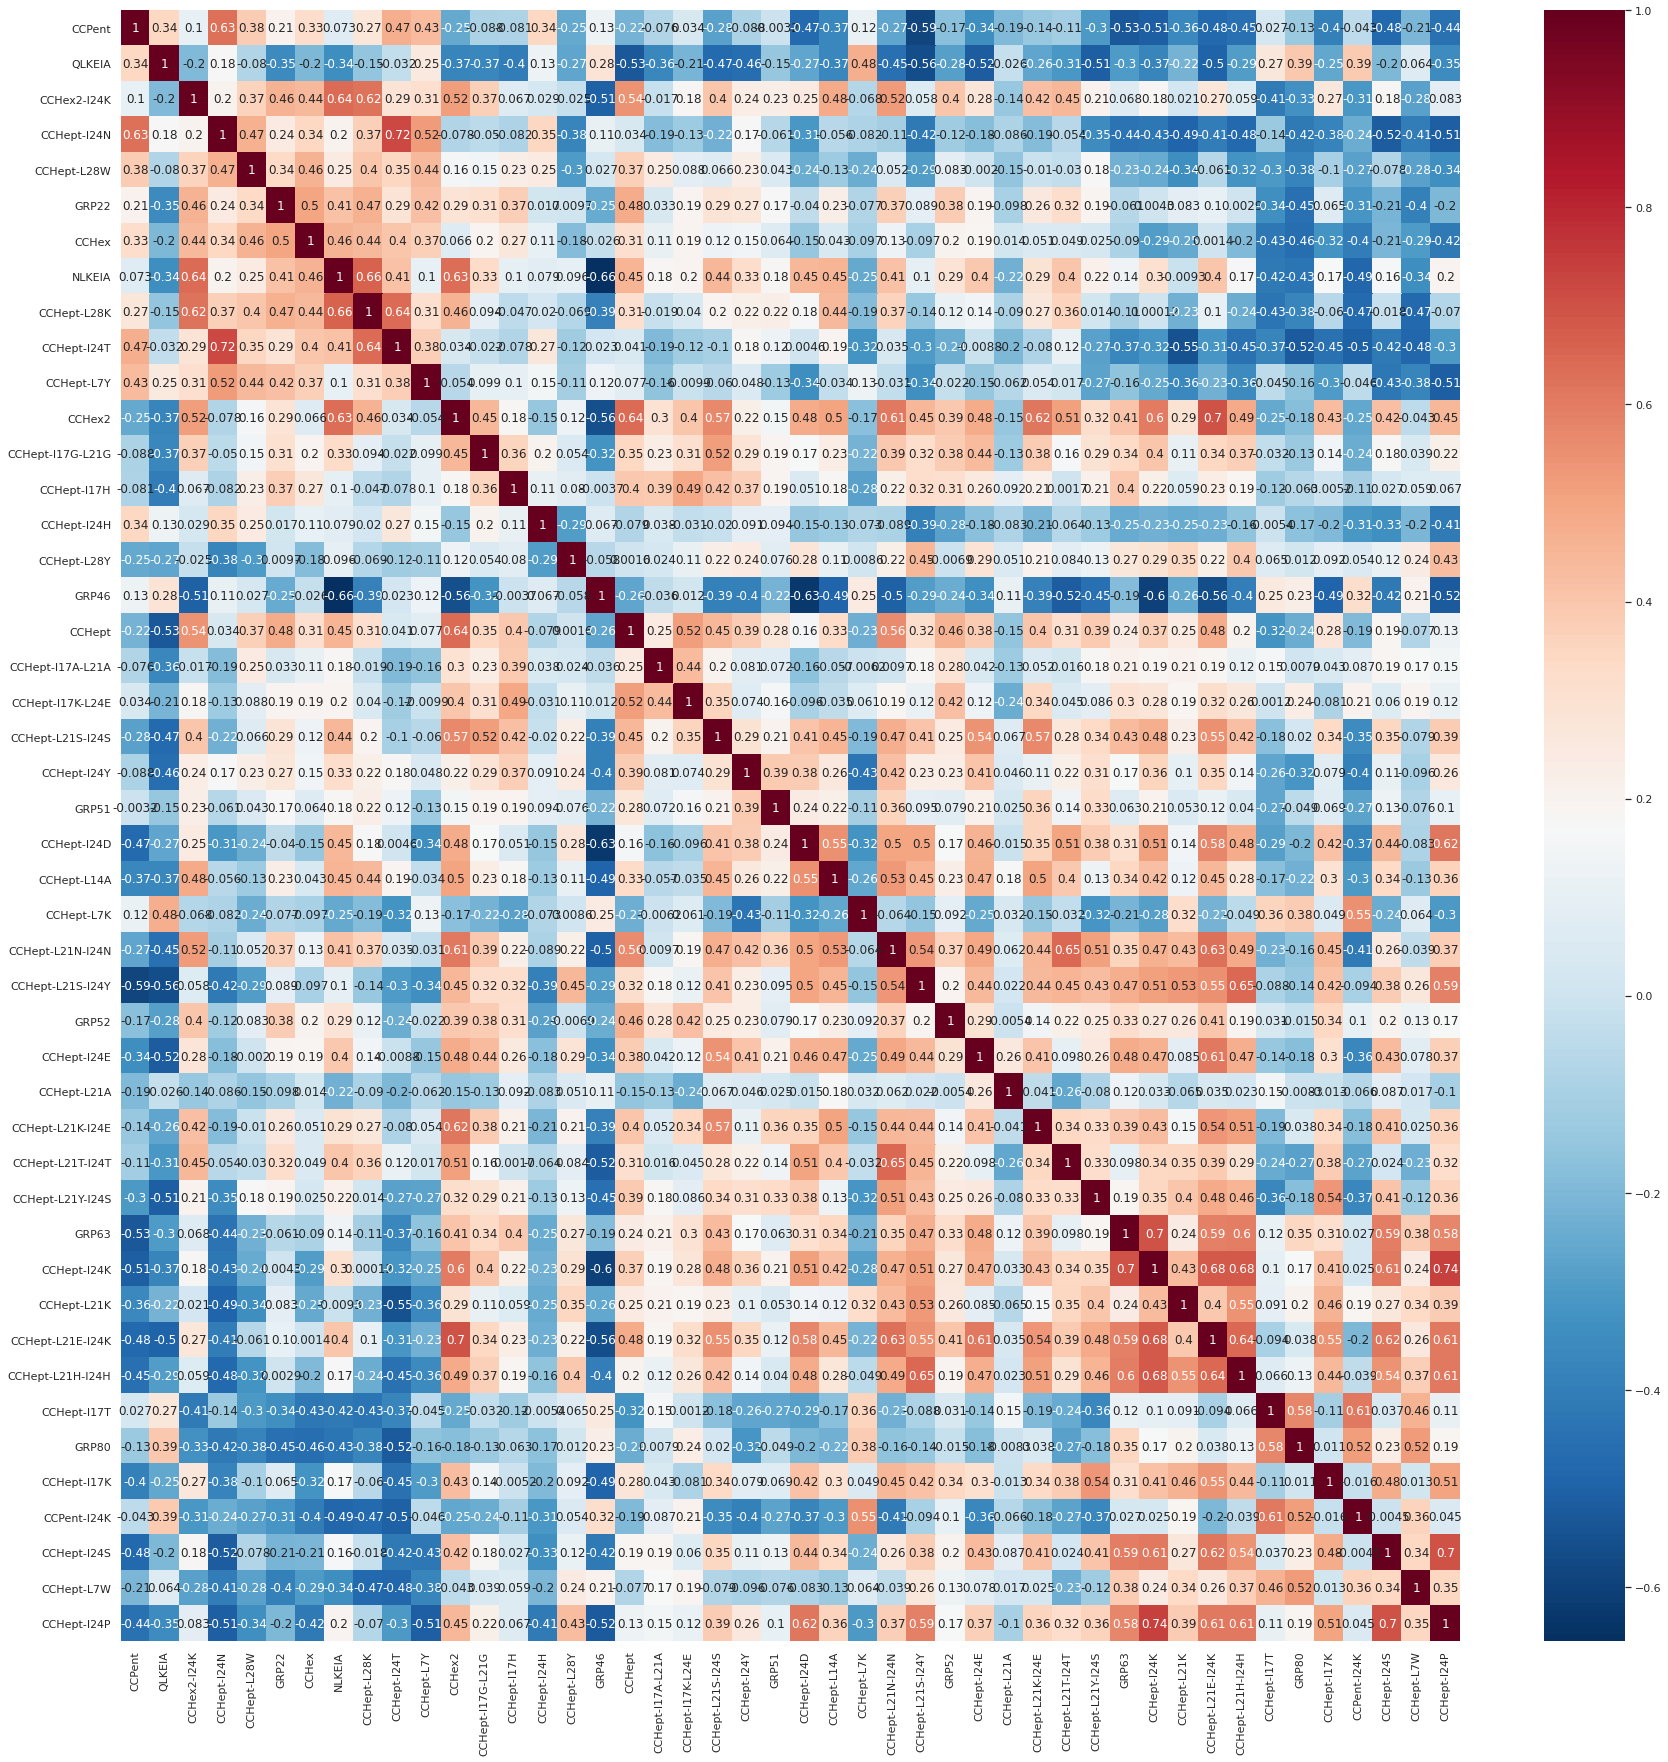

In [13]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features with ANOVA

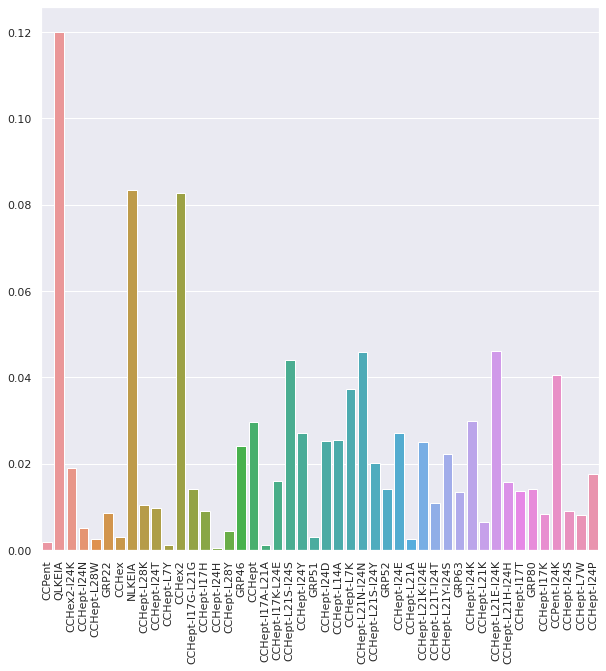

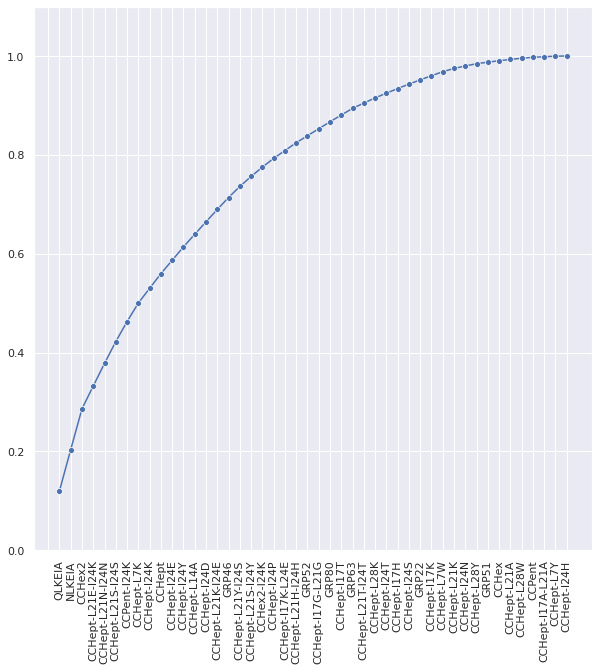

In [14]:
from sklearn.feature_selection import f_classif
f_classif_kbest_df = ml.calc_feature_importances_kbest(x=ml.x, y=ml.y, method_classif=f_classif)

In [15]:
print('Barrels ordered by ANOVA score:')
f_classif_top_barrels = f_classif_kbest_df.nlargest(n=46, columns='Score')
f_classif_top_barrels

Barrels ordered by ANOVA score:


Feature     Score
0             QLKEIA  0.119888
1             NLKEIA  0.083498
2             CCHex2  0.082774
3   CCHept-L21E-I24K  0.046037
4   CCHept-L21N-I24N  0.045831
5   CCHept-L21S-I24S  0.044154
6        CCPent-I24K  0.040469
7         CCHept-L7K  0.037412
8        CCHept-I24K  0.029868
9             CCHept  0.029575
10       CCHept-I24E  0.027080
11       CCHept-I24Y  0.027054
12       CCHept-L14A  0.025534
13       CCHept-I24D  0.025211
14  CCHept-L21K-I24E  0.025080
15             GRP46  0.024112
16  CCHept-L21Y-I24S  0.022387
17  CCHept-L21S-I24Y  0.020187
18       CCHex2-I24K  0.018979
19       CCHept-I24P  0.017562
20  CCHept-I17K-L24E  0.015910
21  CCHept-L21H-I24H  0.015749
22             GRP52  0.014256
23  CCHept-I17G-L21G  0.014149
24             GRP80  0.014106
25       CCHept-I17T  0.013620
26             GRP63  0.013432
27  CCHept-L21T-I24T  0.010810
28       CCHept-L28K  0.010350
29       CCHept-I24T  0.009778
30       CCHept-I17H  0.009140
31       CCHept-I24S  0.009099
32             GRP22  0.008581
33       CCHept-I17K  0.008311
34        CCHept-L7W  0.008227
35       CCHept-L21K  0.006552
36       CCHept-I24N  0.005080
37       CCHept-L28Y  0.004488
38             GRP51  0.003162
39             CCHex  0.002944
40       CCHept-L21A  0.002576
41       CCHept-L28W  0.002508
42            CCPent  0.001811
43  CCHept-I17A-L21A  0.001158
44        CCHept-L7Y  0.001118
45       CCHept-I24H  0.000394

- Measure the relative importances of the initial 46 features with decision trees

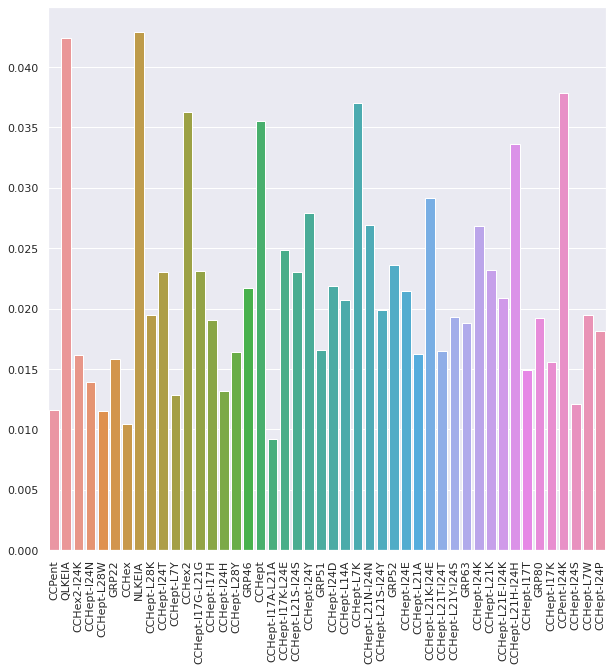

In [16]:
tree_feat_importances_df = ml.calc_feature_importances_tree(x=ml.x, y=ml.y)

In [17]:
print('Barrels ordered by tree score:')
tree_top_barrels = tree_feat_importances_df.nlargest(n=46, columns='Score')
tree_top_barrels

Barrels ordered by tree score:


Feature     Score
7             NLKEIA  0.042851
1             QLKEIA  0.042358
42       CCPent-I24K  0.037829
25        CCHept-L7K  0.037029
11            CCHex2  0.036250
17            CCHept  0.035504
38  CCHept-L21H-I24H  0.033591
31  CCHept-L21K-I24E  0.029114
21       CCHept-I24Y  0.027933
26  CCHept-L21N-I24N  0.026924
35       CCHept-I24K  0.026823
19  CCHept-I17K-L24E  0.024874
28             GRP52  0.023621
36       CCHept-L21K  0.023204
12  CCHept-I17G-L21G  0.023123
20  CCHept-L21S-I24S  0.023064
9        CCHept-I24T  0.023050
23       CCHept-I24D  0.021871
16             GRP46  0.021681
29       CCHept-I24E  0.021481
37  CCHept-L21E-I24K  0.020911
24       CCHept-L14A  0.020730
27  CCHept-L21S-I24Y  0.019881
44        CCHept-L7W  0.019457
8        CCHept-L28K  0.019429
33  CCHept-L21Y-I24S  0.019264
40             GRP80  0.019184
13       CCHept-I17H  0.019035
34             GRP63  0.018814
45       CCHept-I24P  0.018108
22             GRP51  0.016604
32  CCHept-L21T-I24T  0.016468
15       CCHept-L28Y  0.016376
30       CCHept-L21A  0.016240
2        CCHex2-I24K  0.016182
5              GRP22  0.015818
41       CCHept-I17K  0.015615
39       CCHept-I17T  0.014918
3        CCHept-I24N  0.013891
14       CCHept-I24H  0.013177
10        CCHept-L7Y  0.012851
43       CCHept-I24S  0.012121
0             CCPent  0.011564
4        CCHept-L28W  0.011531
6              CCHex  0.010426
18  CCHept-I17A-L21A  0.009235

- Run PCA to perform feature extraction and determine the number of features required to explain x% of the output signal

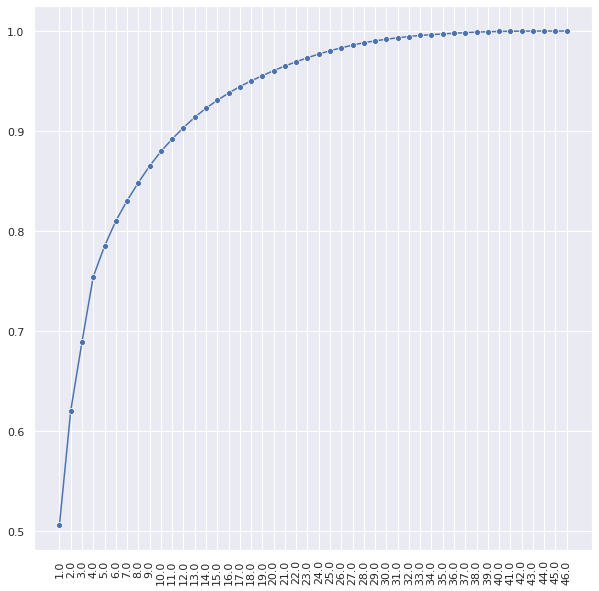

In [18]:
all_features_pca = ml.run_pca(x=ml.x)

~90% of the data can be explained by 12 features.

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [19]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [20]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.035570  0.609372    -0.153925     0.030217    -0.010772   
2         -0.105106  0.277163    -0.033090    -0.183361    -0.077103   
3         -0.142907 -0.532494    -0.319283    -0.132389    -0.083964   
4         -0.054517  0.168898     0.010989    -0.039715    -0.036544   
5          0.093297 -0.112263    -0.074904     0.121740    -0.023499   
6          0.005369  0.330611    -0.045744     0.058157     0.003686   
7          0.112923 -0.078196    -0.217851     0.005306    -0.032795   
8          0.077038  0.026635     0.115868     0.044802     0.093977   
9         -0.074345  0.093097     0.042701    -0.240646    -0.015381   
10        -0.091188 -0.015070     0.085133     0.049018     0.101319   
11        -0.027718 -0.136983     0.146510     0.113519     0.011396   
12        -0.300052  0.051494    -0.159651    -0.043704    -0.133457   
13         0.070718  0.096280    -0.165186     0.095446     0.161362   
14        -0.241411  0.060430     0.133174     0.011156     0.077400   
15        -0.213537 -0.001239    -0.000743    -0.091140     0.042004   
16         0.193062  0.033869    -0.138580     0.005795     0.041934   
17         0.136775  0.012206     0.029956    -0.198076     0.015072   
18         0.117415  0.066403    -0.366731     0.176845    -0.073435   
19         0.021998  0.046224     0.116620     0.028348     0.113378   
20        -0.170399 -0.032232     0.066180    -0.331447     0.125373   
21         0.084061 -0.046959     0.274892     0.054935     0.122918   
22         0.202609 -0.021506     0.123696     0.231385     0.108114   
23         0.121962  0.093032     0.060652    -0.262832     0.004789   
24        -0.102508 -0.003719     0.263921    -0.081919    -0.066663   
25        -0.012641  0.036654     0.002458     0.350174     0.129397   
26         0.085290  0.015503    -0.253355     0.041942     0.113816   
27         0.122112  0.009316    -0.128515    -0.077256     0.067745   
28         0.268902 -0.021439     0.191459    -0.059016    -0.118349   
29         0.326547  0.034462    -0.277832    -0.241587    -0.012720   
30        -0.199118  0.135183    -0.039575    -0.083333    -0.136507   
31         0.114171 -0.062238     0.029681     0.000912    -0.043825   
32         0.185162 -0.044690     0.050088    -0.076603    -0.106306   
33        -0.083281  0.063508     0.059666    -0.097361     0.017285   
34        -0.053623  0.044269     0.121821     0.117349    -0.253234   
35         0.005245 -0.048613     0.081627    -0.161336    -0.203469   
36        -0.061023  0.011209    -0.035438    -0.026012     0.358543   
37         0.041623 -0.029054     0.097852     0.030365    -0.224730   
38         0.135381  0.049327     0.106473     0.073691    -0.358818   
39         0.280878 -0.005797     0.092658    -0.281382    -0.184953   
40         0.014416 -0.017449    -0.158506    -0.078316     0.206226   
41        -0.336069 -0.008577    -0.173753     0.163142    -0.192464   
42        -0.157491  0.037397    -0.060077    -0.160508    -0.053129   
43         0.022801  0.022810    -0.179531    -0.068445    -0.274731   
44        -0.074559  0.068470     0.123799    -0.109679     0.047925   
45         0.063243  0.012494     0.034310    -0.080618     0.323819   
46        -0.042014 -0.034532    -0.061268    -0.312574     0.229023   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.076633 -0.032837 -0.174640    -0.048237    -0.023084  ...   
2         -0.043618 -0.163915 -0.070118    -0.097008    -0.253789  ...   
3         -0.185370 -0.182516 -0.209450    -0.154902    -0.143725  ...   
4         -0.066691 -0.160508  0.007001     0.034344    -0.022490  ...   
5          0.019906 -0.002853  0.137686     0.138475     0.280442  ...   
6         -0.209981 -0.161500  0.08497

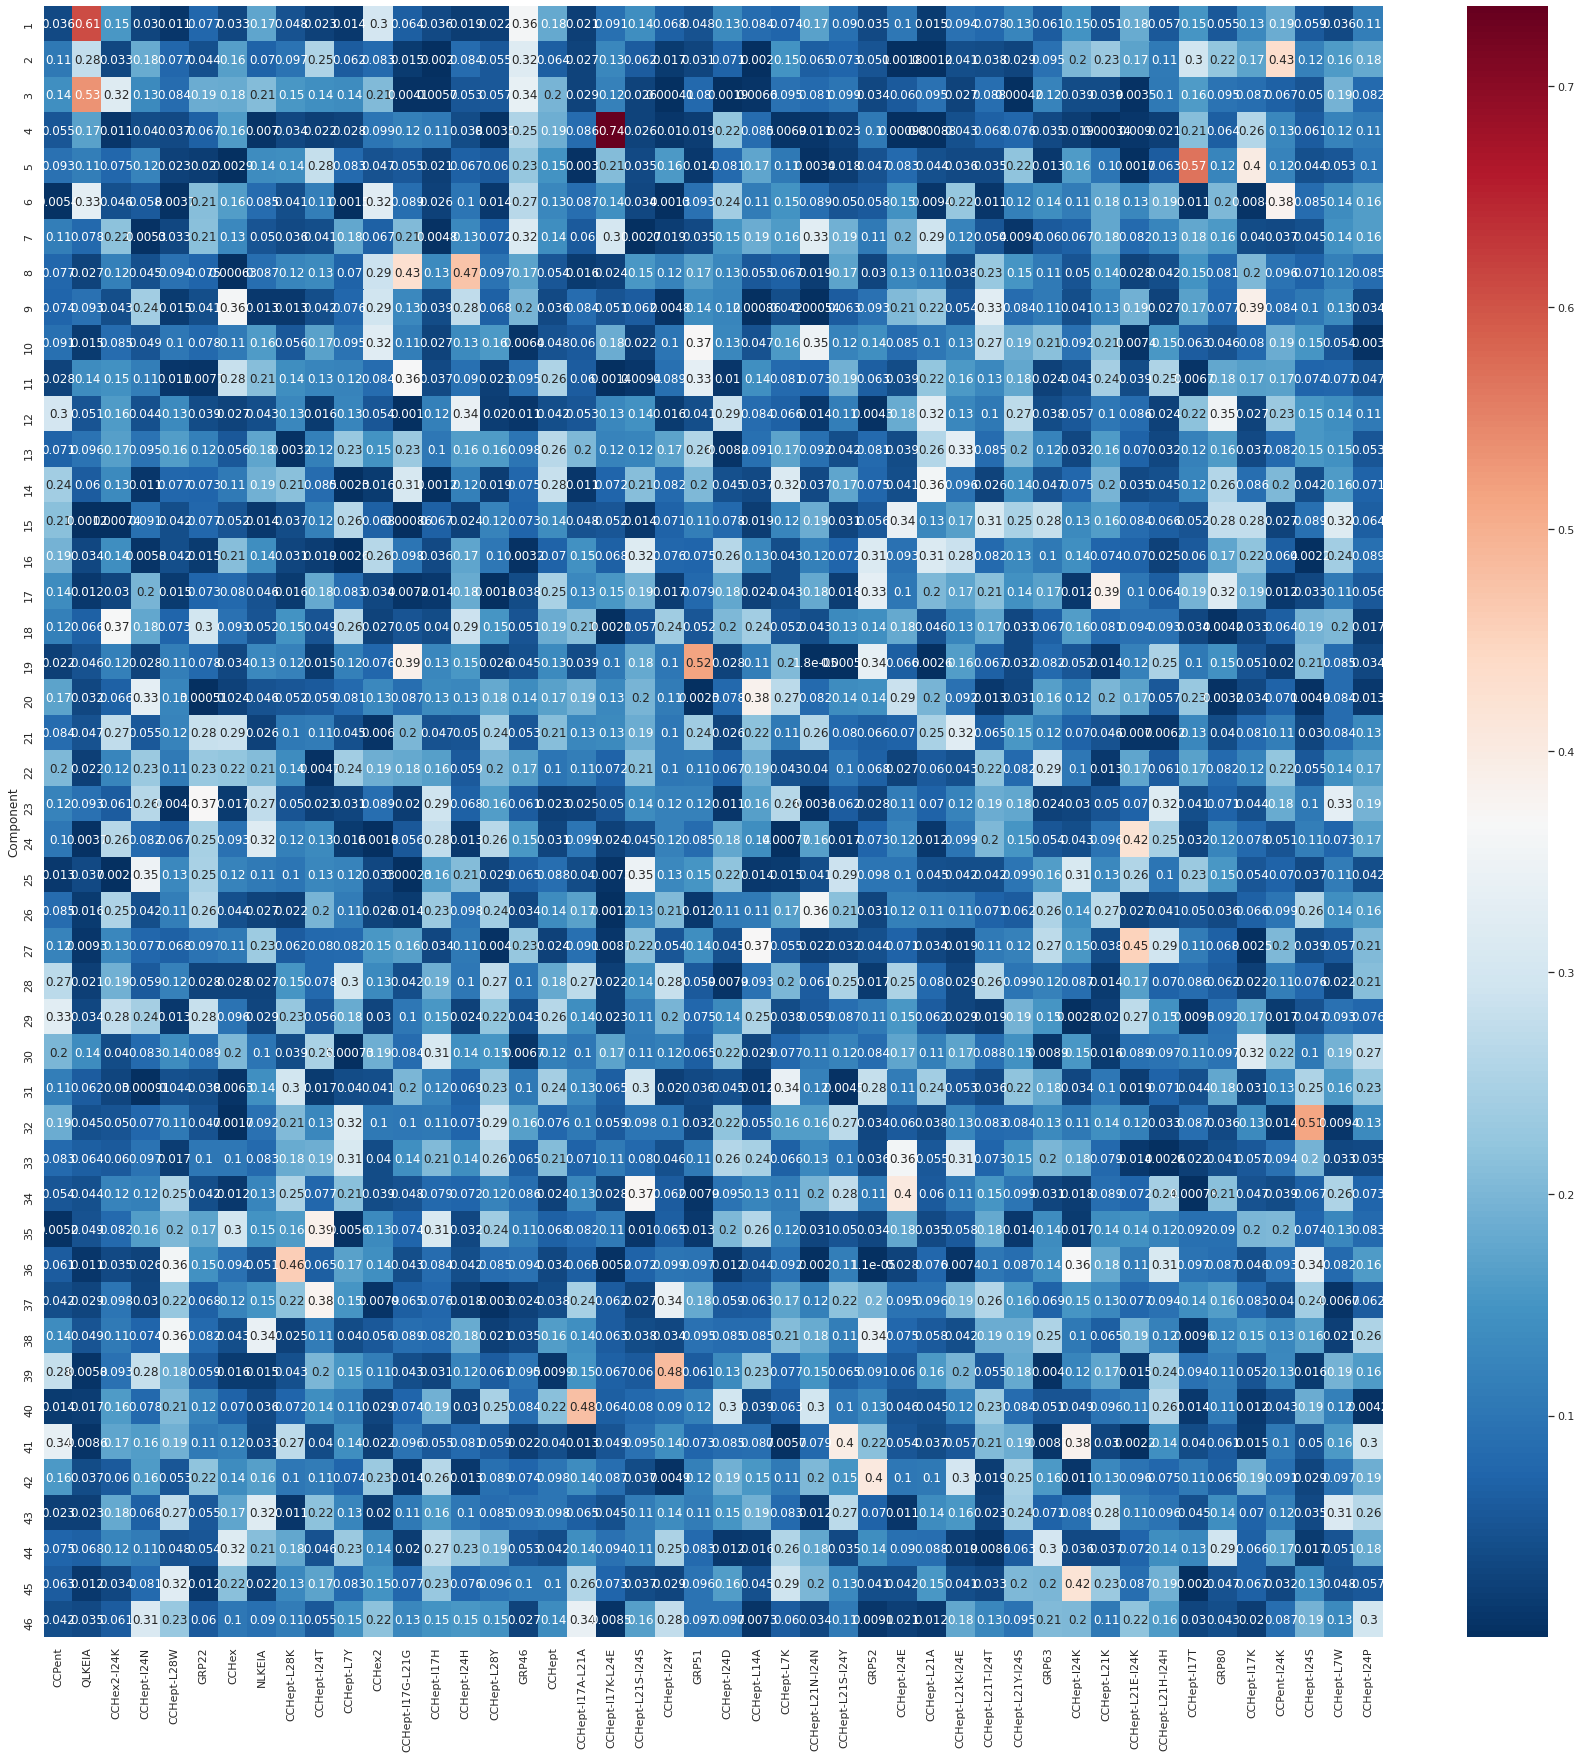

In [21]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [22]:
top_pca_components = []
for row in range(pca_components.shape[0]):
    indices = np.argsort(pca_components.abs().iloc[row])
    barrel_1 = ml.features[indices[-1]]
    barrel_2 = ml.features[indices[-2]]
    for barrel in [barrel_1, barrel_2]:
        if not barrel in top_pca_components:
            top_pca_components.append(barrel)

print('Top two barrels per PCA component:')
for barrel in top_pca_components:
    print(barrel)
print(len(top_pca_components))

Top two barrels per PCA component:
QLKEIA
GRP46
CCPent-I24K
CCHept-I17K-L24E
CCHept-I17K
CCHept-I17T
CCHept-L21N-I24N
CCHept-I24H
CCHept-I17G-L21G
CCHex
GRP51
GRP80
CCHept-L21K-I24E
CCHept
CCHept-L21A
CCHept-L7K
CCHept-I24E
CCHept-L7W
CCHept-L21S-I24S
GRP52
CCHept-L21K
CCHex2-I24K
GRP22
CCHept-L14A
CCHept-I24N
GRP63
CCHept-L7Y
CCHept-L21E-I24K
NLKEIA
CCHept-I24Y
CCPent
CCHept-I17H
CCHept-I24S
CCHept-I24T
CCHept-L28K
CCHept-I24K
CCHept-L28W
CCHept-I17A-L21A
CCHept-L21S-I24Y
39


Relative contribution of each barrel to the different PCA components

In [23]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components).abs().div(col_sums, axis=1)

In [24]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.006488  0.162094     0.027957     0.005676     0.002058   
2          0.019173  0.073726     0.006010     0.034444     0.014733   
3          0.026068  0.141645     0.057991     0.024869     0.016044   
4          0.009945  0.044927     0.001996     0.007460     0.006983   
5          0.017018  0.029862     0.013605     0.022868     0.004490   
6          0.000979  0.087943     0.008309     0.010925     0.000704   
7          0.020599  0.020800     0.039568     0.000997     0.006267   
8          0.014053  0.007085     0.021045     0.008416     0.017957   
9          0.013561  0.024764     0.007756     0.045205     0.002939   
10         0.016634  0.004009     0.015463     0.009208     0.019360   
11         0.005056  0.036438     0.026610     0.021324     0.002178   
12         0.054733  0.013698     0.028997     0.008210     0.025501   
13         0.012900  0.025611     0.030003     0.017929     0.030833   
14         0.044036  0.016074     0.024188     0.002096     0.014790   
15         0.038952  0.000330     0.000135     0.017120     0.008026   
16         0.035217  0.009009     0.025170     0.001089     0.008013   
17         0.024949  0.003247     0.005441     0.037208     0.002880   
18         0.021418  0.017663     0.066609     0.033220     0.014032   
19         0.004013  0.012296     0.021182     0.005325     0.021665   
20         0.031083  0.008574     0.012020     0.062261     0.023957   
21         0.015334  0.012491     0.049928     0.010319     0.023487   
22         0.036958  0.005721     0.022467     0.043465     0.020659   
23         0.022247  0.024747     0.011016     0.049372     0.000915   
24         0.018699  0.000989     0.047936     0.015388     0.012738   
25         0.002306  0.009750     0.000446     0.065779     0.024726   
26         0.015558  0.004124     0.046017     0.007879     0.021748   
27         0.022275  0.002478     0.023342     0.014512     0.012945   
28         0.049051  0.005703     0.034775     0.011086     0.022614   
29         0.059566  0.009167     0.050462     0.045381     0.002431   
30         0.036322  0.035959     0.007188     0.015654     0.026084   
31         0.020826  0.016555     0.005391     0.000171     0.008374   
32         0.033776  0.011888     0.009097     0.014390     0.020313   
33         0.015192  0.016893     0.010837     0.018289     0.003303   
34         0.009782  0.011776     0.022126     0.022044     0.048388   
35         0.000957  0.012931     0.014826     0.030306     0.038879   
36         0.011131  0.002982     0.006437     0.004886     0.068511   
37         0.007592  0.007729     0.017773     0.005704     0.042942   
38         0.024695  0.013121     0.019339     0.013843     0.068564   
39         0.051236  0.001542     0.016829     0.052857     0.035341   
40         0.002630  0.004641     0.028789     0.014711     0.039406   
41         0.061303  0.002282     0.031559     0.030646     0.036776   
42         0.028728  0.009948     0.010912     0.030151     0.010152   
43         0.004159  0.006068     0.032608     0.012857     0.052496   
44         0.013600  0.018213     0.022486     0.020603     0.009158   
45         0.011536  0.003323     0.006232     0.015144     0.061876   
46         0.007664  0.009186     0.011128     0.058716     0.043762   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.014445  0.006180  0.032204     0.009007     0.004281  ...   
2          0.008222  0.030848  0.012930     0.018113     0.047069  ...   
3          0.034941  0.034349  0.038622     0.028923     0.026656  ...   
4          0.012571  0.030207  0.001291     0.006413     0.004171  ...   
5          0.003752  0.000537  0.025389     0.025856     0.052012  ...   
6          0.039580  0.030394  0.01567

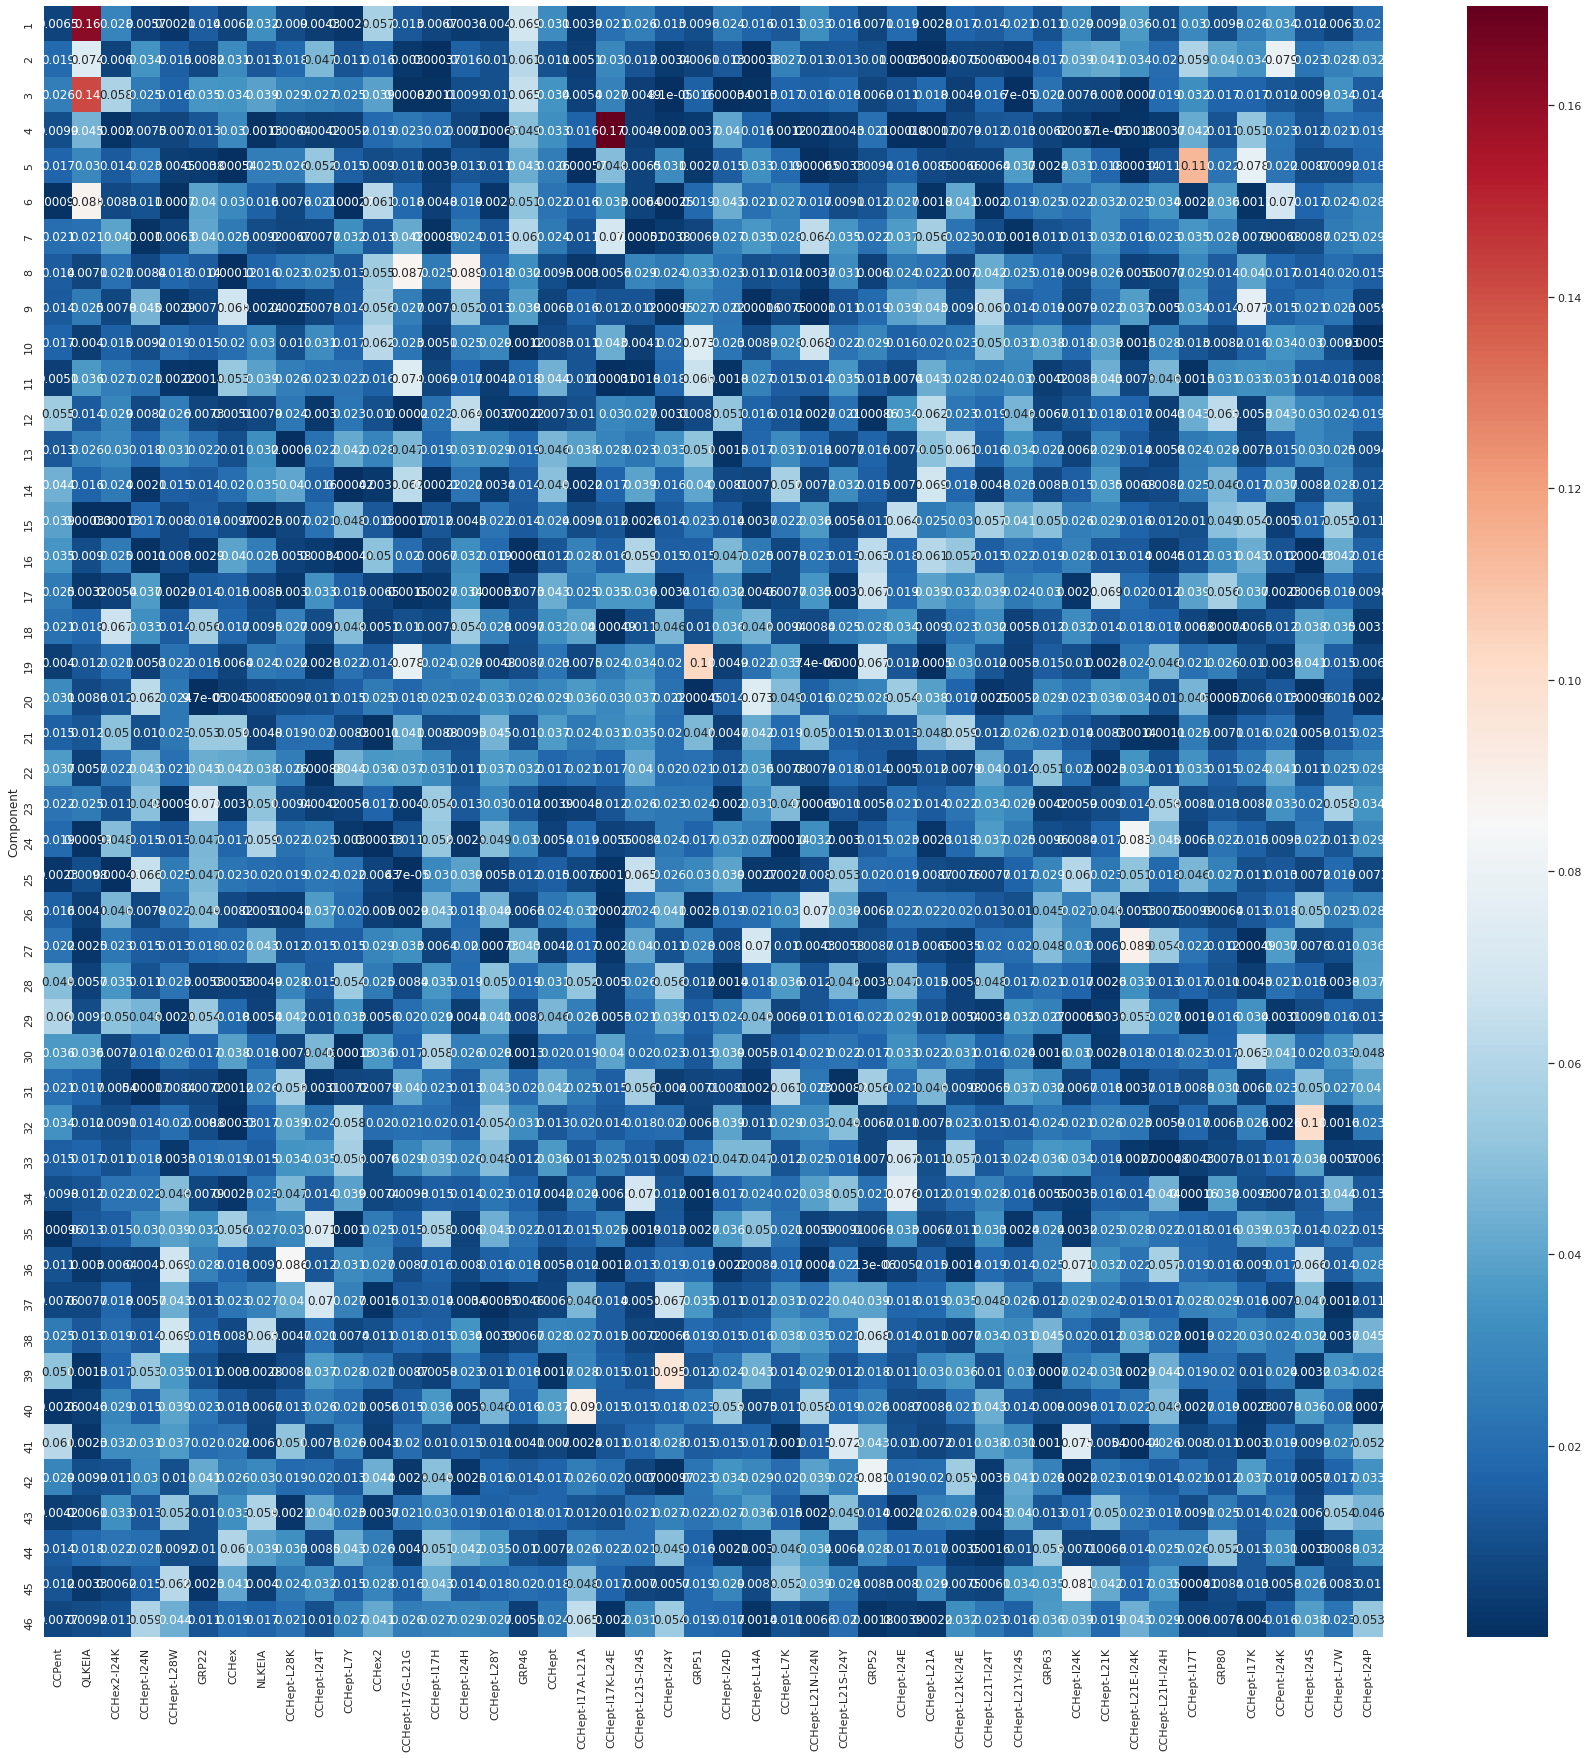

In [25]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components, cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_relative_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [26]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    # random.shuffle(extra_colours)
    colours += extra_colours[::-1]
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

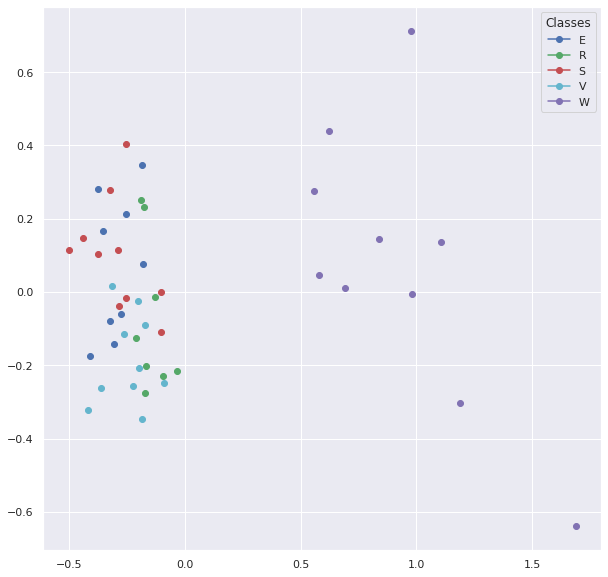

In [27]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 2D scatter plot
plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

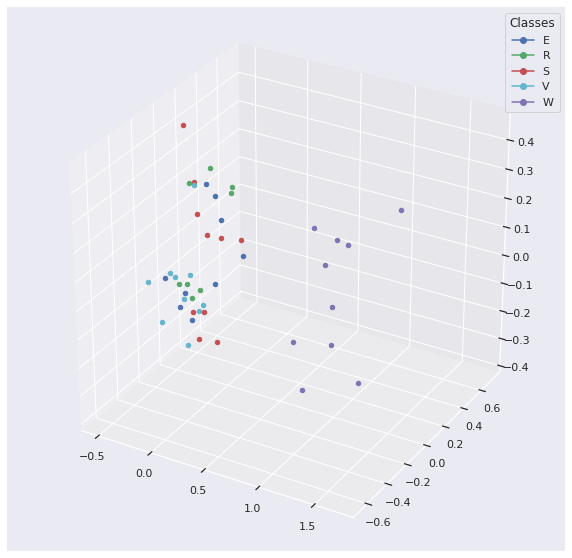

In [28]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca_3d = PCA(n_components=3)
pca_fitted = pca_3d.fit(X=ml.x)
X_reduced_3d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
plot_scatter(
    x_data=X_reduced_3d, y_data=ml.y, dimensions=3, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

##### Train models with different numbers of features and/or PCA components

- All features

Runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [29]:
n_components_pca = None  # Specifies not to run PCA
cv_folds_inner_loop = 5  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 5  # Number of splits in nested cross-validation inner loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
all_feat_random_cv_searches = {}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]
for algorithm in algorithms:
    for resampling_method in resampling_methods:
        fixed_params = ml.define_fixed_model_params(clf=algorithm())
        tuned_params = ml.define_tuned_model_params(clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop)
        nested_cv_search = ml.run_nested_CV(
            clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups, selected_features=ml.features,
            n_components_pca=n_components_pca, run='randomsearch', fixed_params=fixed_params,
            tuned_params=tuned_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
            resampling_method=resampling_method, n_iter=n_iter, cv_folds_inner_loop=cv_folds_inner_loop,
            cv_folds_outer_loop=cv_folds_outer_loop, draw_conf_mat=False
        )

        score_dict['Algorithm'].append(algorithm.__name__)
        score_dict['Resampling_method'].append(resampling_method)
        score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
        score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
        all_feat_random_cv_searches['{}__{}'.format(algorithm.__name__, resampling_method)] = nested_cv_search

        for index, model in enumerate(nested_cv_search['outer_loop_models']):
            print('\n\n\n\n\n')
            print('{}: {}'.format(algorithm.__name__, resampling_method))
            print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
            print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

all_feat_random_search_score_df = pd.DataFrame(score_dict)

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.4






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.4






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.6666666666666666






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.01}
Accuracy: 0.4444444444444444






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.01}
Accuracy: 0.4444444444444444






KNeighborsClassifier: no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbors': 7}
Accuracy: 0.5






KNeighborsClassi

In [30]:
all_feat_random_search_score_df

Algorithm Resampling_method  Average_accuracy  Std_dev_accuracy
0    LogisticRegression      no_balancing          0.471111          0.099778
1  KNeighborsClassifier      no_balancing          0.466667          0.027217
2            GaussianNB      no_balancing          0.535556          0.131918
3             LinearSVC      no_balancing          0.422222          0.075359
4                   SVC      no_balancing          0.531111          0.112962

The algorithms perform similarly - will select GaussianNB since has best average performance (but which is within error of the performances of the other algorithms), and also doesn't require any hyperparameter tuning

In [31]:
all_feat_random_cv_searches['GaussianNB__no_balancing']['outer_loop_params']

[{}, {}, {}, {}, {}]

In [32]:
all_feat_random_cv_searches['GaussianNB__no_balancing']['best_outer_loop_params']

{}

In [33]:
all_feat_random_cv_searches['GaussianNB__no_balancing']['test_scores']['accuracy']

[0.4, 0.5, 0.4444444444444444, 0.5555555555555556, 0.7777777777777778]

In [34]:
all_feat_pred = all_feat_random_cv_searches['GaussianNB__no_balancing']['predictions']
all_feat_y_true = all_feat_random_cv_searches['GaussianNB__no_balancing']['y_true']
all_feat_x_true = all_feat_random_cv_searches['GaussianNB__no_balancing']['x_true']

all_feat_flat_pred = [pred for pred_array in all_feat_pred for pred in pred_array]
all_feat_flat_y_true = [y for y_array in all_feat_y_true for y in y_array]
all_feat_flat_x_true = np.array([x for x_array in all_feat_x_true for x in x_array])

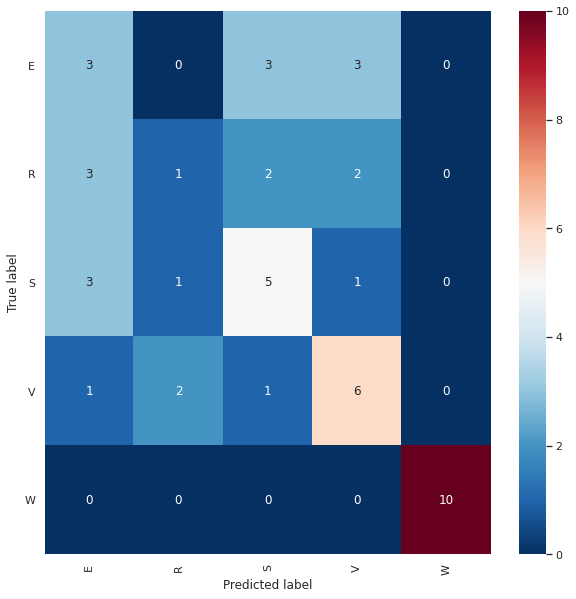

Normalised over true label (rows)


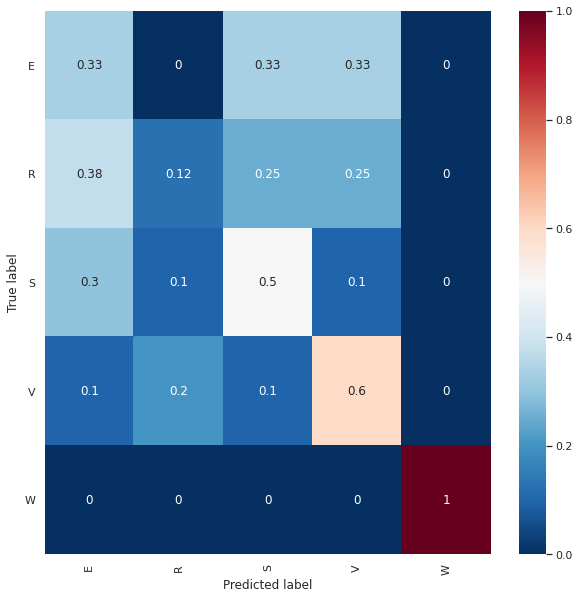

Normalised over pred label (columns)


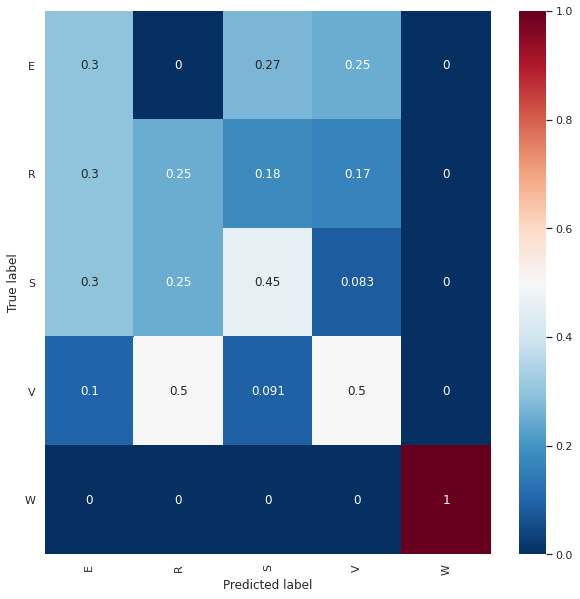

In [35]:
normalisation_methods = OrderedDict({None: '',
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(all_feat_flat_y_true, all_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=all_feat_flat_y_true, y_pred=all_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.savefig('{}/All_feat_confusion_matrix.svg'.format(ml.results_dir))
    plt.show()

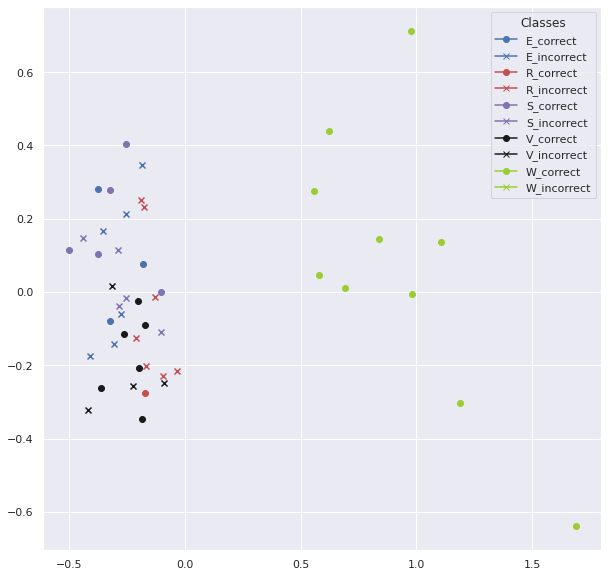

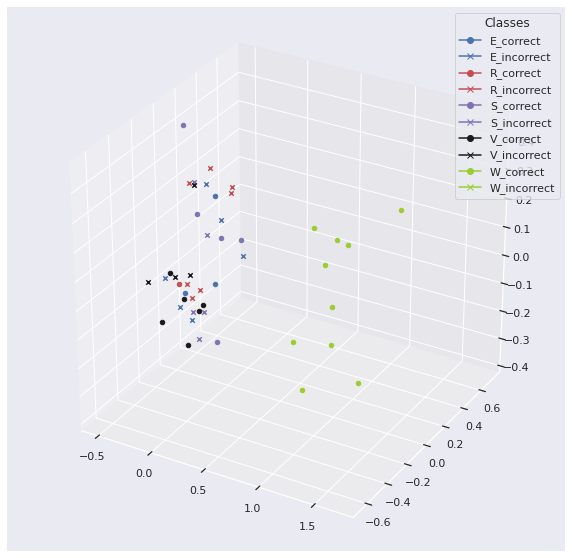

In [36]:
all_feat_X_test_reduced = pca_fitted.transform(X=all_feat_flat_x_true)
all_feat_pred_hue = []
for index, y in enumerate(all_feat_flat_y_true):
    if all_feat_flat_pred[index] == y:
        all_feat_pred_hue.append('{}_correct'.format(y))
    else:
        all_feat_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=2,
    categories=['E_correct', 'E_incorrect', 'R_correct', 'R_incorrect', 'S_correct', 'S_incorrect', 'V_correct',
                'V_incorrect', 'W_correct', 'W_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=3,
    categories=['E_correct', 'E_incorrect', 'R_correct', 'R_incorrect', 'S_correct', 'S_incorrect', 'V_correct',
                'V_incorrect', 'W_correct', 'W_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# S_incorrect = Value that is actually Serine is predicted to be something else

- Feature reduction - how many barrels can I reduce the array to whilst maintaining / improving performance?

Compares 3 different methods of feature reduction / extraction with 8 different numbers of features. For each method, runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- feature selection
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [37]:
cv_folds_inner_loop = 5  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 5  # Number of splits in nested cross-validation inner loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV

num_features = [1, 2, 3, 5, 10, 15, 20, 30]
red_methods = ['anova', 'tree', 'top_pca_components']  # 'pca' - can't use to reduce number of barrels
red_data = {'pca': {'selected_features': ml.features},
            'anova': {'selected_features': f_classif_top_barrels['Feature'].tolist()},
            'tree': {'selected_features': tree_top_barrels['Feature'].tolist()},
            'top_pca_components': {'selected_features': top_pca_components}}
resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]

score_dict = OrderedDict({'Number_of_features': [],
                          'Feature_reduction_method': [],
                          'Algorithm': [],
                          'Resampling_method': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

red_feat_random_cv_searches = {}
for num in num_features:
    for red_method in red_methods:
        for algorithm in algorithms:
            for resampling_method in resampling_methods:
                fixed_params = ml.define_fixed_model_params(clf=algorithm())
                tuned_params = ml.define_tuned_model_params(
                    clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop
                )
                if red_method == 'pca':
                    selected_features = red_data['pca']['selected_features']
                    n_components_pca = num
                else:
                    selected_features = red_data['pca']['selected_features'][:num]
                    n_components_pca = None

                nested_cv_search = ml.run_nested_CV(
                    clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups,
                    selected_features=selected_features, n_components_pca=n_components_pca, run='randomsearch',
                    fixed_params=fixed_params, tuned_params=tuned_params, train_scoring_func='accuracy',
                    test_scoring_funcs=scoring_funcs, resampling_method=resampling_method, n_iter=n_iter,
                    cv_folds_inner_loop=cv_folds_inner_loop, cv_folds_outer_loop=cv_folds_outer_loop,
                    draw_conf_mat=False
                )

                score_dict['Number_of_features'].append(num)
                score_dict['Feature_reduction_method'].append(red_method)
                score_dict['Algorithm'].append(algorithm.__name__)
                score_dict['Resampling_method'].append(resampling_method)
                score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
                score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
                red_feat_random_cv_searches[
                    '{}__{}__{}__{}'.format(num, red_method, algorithm.__name__, resampling_method)
                ] = nested_cv_search

                for index, model in enumerate(nested_cv_search['outer_loop_models']):
                    print('\n\n\n\n\n')
                    print('{}__{}__{}__{}'.format(num, red_method, algorithm.__name__, resampling_method))
                    print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
                    print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

red_feat_random_search_score_df = pd.DataFrame(score_dict)

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.001}
Accuracy: 0.2






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.01}
Accuracy: 0.2






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.3333333333333333






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2222222222222222






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.1111111111111111






1__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.2






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.1}
Accuracy: 0.2






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.1111111111111111






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 0.2222222222222222






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.03162277660168379}
Accuracy: 0.2222222222222222






1__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights'

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.01}
Accuracy: 0.1






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.2






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.3333333333333333






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.3






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.3






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.4444444444444444






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.4444444444444444






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.3333333333333333






2__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric':

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any eff







2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.2






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.4






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.4444444444444444






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.5555555555555556






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.2222222222222222






2__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'wei

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.4






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.4






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.4444444444444444






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.4444444444444444






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.2222222222222222






2__top_pca_components__KNeig

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.4






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.3






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.03162277660168379}
Accuracy: 0.4444444444444444






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 0.3333333333333333






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.3333333333333333






3__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'w

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.4






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.3






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.3333333333333333






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.3333333333333333






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.4444444444444444






3__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski',

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.4






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.5






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.2222222222222222






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'mult

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.5






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.5






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.5555555555555556






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.3333333333333333






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.3333333333333333






5__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'di

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.4






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.4






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.3333333333333333






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.5555555555555556






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.4444444444444444






5__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': '

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.1






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.5






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.5555555555555556






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C'

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.03162277660168379}
Accuracy: 0.4






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.4






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.3333333333333333






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.5555555555555556






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.3333333333333333






10__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric':

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.4






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.3






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.4444444444444444






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Acc

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any eff

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.4






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.4






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.4444444444444444






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.4444444444444444






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.5555555555555556


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any eff

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.5






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.3






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.2222222222222222






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.001}
Accuracy: 0.6666666666666666






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.4444444444444444






15__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski'

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.6






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.6






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.4444444444444444






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.5555555555555556






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.5555555555555556






15__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowsk

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any eff







15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.4






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.001}
Accuracy: 0.4






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.4444444444444444






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.5555555555555556






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.4444444444444444






15__top_pca_component

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.4






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.5






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.5555555555555556






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.6666666666666666






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.5555555555555556






20__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minko

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any eff

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.5






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.01}
Accuracy: 0.5






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.6666666666666666






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any eff







20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.2






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.4






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.4444444444444444






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.6666666666666666






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.5555555555555556






20__top_pca_components__KNeighborsClassifier__no

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 0.001


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.4






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.01}
Accuracy: 0.6






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.6666666666666666






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.001}
Accuracy: 0.4444444444444444






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.4444444444444444






30__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs'

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations







30__anova__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 0.0625}
Accuracy: 0.6






30__anova__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 0.03125}
Accuracy: 0.3






30__anova__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 362.03867196751236}
Accuracy: 0.4444444444444444






30__anova__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 0.125}
Accuracy: 0.3333333333333333






30__anova__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 724.0773439350247}
Accuracy: 0.4444444444444444






30__anova__SVC__no_balancing
Parameters: {'gamma': 0.0009765625, 'C': 32.0}
Accuracy: 0.5






30__anova__SVC__no_balancing
Parameters: {'gamma': 4.315837287515549e-05, 'C': 362.03867196751236}
Accuracy: 0.6






30__anova__SVC__no_balancing
Parameters: {'gamma': 0.001953125, 'C': 4.0}
Accuracy: 0.4444444444444444






30__anova__SVC__no_balancing
Parameters: {'gamma': 0.011048543456039806, 'C': 1.4142135623730951}
Accuracy: 0.666666666666

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.5






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 0.4






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.3333333333333333






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.5555555555555556






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.4444444444444444






30__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'mink

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Range tested: [3.12500000e-02 4.41941738e-02 6.25000000e-02 8.83883476e-02
 1.25000000e-01 1.76776695e-01 2.50000000e-01 3.53553391e-01
 5.00000000e-01 7.07106781e-01 1.00000000e+00 1.41421356e+00
 2.00000000e+00 2.82842712e+00 4.00000000e+00 5.65685425e+00
 8.00000000e+00 1.13137085e+01 1.60000000e+01 2.26274170e+01
 3.20000000e+01 4.52548340e+01 6.40000000e+01 9.05096680e+01
 1.28000000e+02 1.81019336e+02 2.56000000e+02 3.62038672e+02
 5.12000000e+02 7.24077344e+02 1.02400000e+03 1.44815469e+03
 2.04800000e+03 2.89630938e+03 4.09600000e+03 5.79261875e+03
 8.19200000e+03 1.15852375e+04 1.63840000e+04 2.31704750e+04
 3.27680000e+04]
Value selected: 0.03125
Range tested: [3.12500000e-02 4.41941738e-02 6.25000000e-02 8.83883476e-02
 1.25000000e-01 1.76776695e-01 2.50000000e-01 3.53553391e-01
 5.00000000e-01 7.07106781e-01 1.00000000e+00 1.41421356e+00
 2.00000000e+00 2.82842712e+00 4.00000000e+00 5.65685425e+00
 8.00000000e+00 1.13137085e+01 1.60000000e+01 2.26274170e+01
 3.20000000e+01 

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.4






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.6






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.0031622776601683794}
Accuracy: 0.4444444444444444






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.5555555555555556






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.5555555555555556






30__top_pca_components__KNeighbors

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Range tested: [3.12500000e-02 4.41941738e-02 6.25000000e-02 8.83883476e-02
 1.25000000e-01 1.76776695e-01 2.50000000e-01 3.53553391e-01
 5.00000000e-01 7.07106781e-01 1.00000000e+00 1.41421356e+00
 2.00000000e+00 2.82842712e+00 4.00000000e+00 5.65685425e+00
 8.00000000e+00 1.13137085e+01 1.60000000e+01 2.26274170e+01
 3.20000000e+01 4.52548340e+01 6.40000000e+01 9.05096680e+01
 1.28000000e+02 1.81019336e+02 2.56000000e+02 3.62038672e+02
 5.12000000e+02 7.24077344e+02 1.02400000e+03 1.44815469e+03
 2.04800000e+03 2.89630938e+03 4.09600000e+03 5.79261875e+03
 8.19200000e+03 1.15852375e+04 1.63840000e+04 2.31704750e+04
 3.27680000e+04]
Value selected: 0.03125






30__top_pca_components__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 0.04419417382415922}
Accuracy: 0.4






30__top_pca_components__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 0.08838834764831845}
Accuracy: 0.5






30__top_pca_components__LinearSVC__no_balancing
Parameters: {'dual': False, 'C': 181.

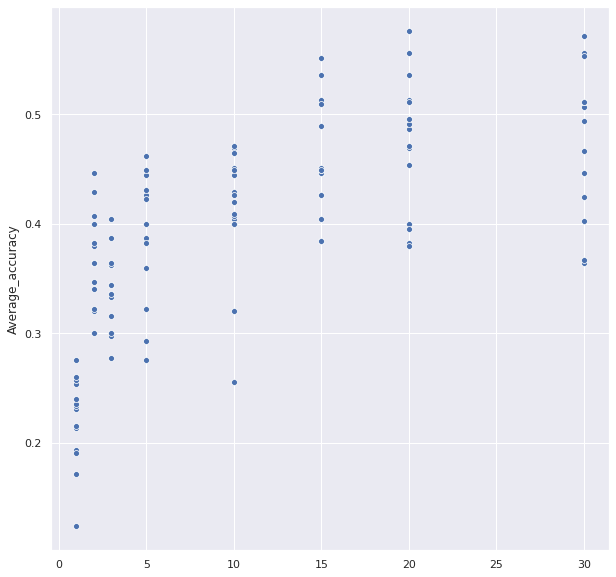

In [38]:
plt.clf()
sns.scatterplot(x=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                   5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                   10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                   15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                   20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
                   30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
                y=red_feat_random_search_score_df['Average_accuracy'])
plt.show()

So, can achieve similar level of performance with 15 barrels

In [39]:
red_feat_random_search_score_df[red_feat_random_search_score_df['Number_of_features'] == 15]

Number_of_features Feature_reduction_method             Algorithm  \
75                  15                    anova    LogisticRegression   
76                  15                    anova  KNeighborsClassifier   
77                  15                    anova            GaussianNB   
78                  15                    anova             LinearSVC   
79                  15                    anova                   SVC   
80                  15                     tree    LogisticRegression   
81                  15                     tree  KNeighborsClassifier   
82                  15                     tree            GaussianNB   
83                  15                     tree             LinearSVC   
84                  15                     tree                   SVC   
85                  15       top_pca_components    LogisticRegression   
86                  15       top_pca_components  KNeighborsClassifier   
87                  15       top_pca_components            GaussianNB   
88                  15       top_pca_components             LinearSVC   
89                  15       top_pca_components                   SVC   

   Resampling_method  Average_accuracy  Std_dev_accuracy  
75      no_balancing          0.426667          0.155651  
76      no_balancing          0.446667          0.118092  
77      no_balancing          0.404444          0.040734  
78      no_balancing          0.384444          0.152283  
79      no_balancing          0.488889          0.103280  
80      no_balancing          0.551111          0.056917  
81      no_balancing          0.513333          0.153059  
82      no_balancing          0.535556          0.086752  
83      no_balancing          0.426667          0.066889  
84      no_balancing          0.446667          0.077108  
85      no_balancing          0.448889          0.056917  
86      no_balancing          0.451111          0.120000  
87      no_balancing          0.448889          0.085085  
88      no_balancing          0.384444          0.058626  
89      no_balancing          0.508889          0.093333

So, LogisticRegression plus feature selection with ExtraTreesClassifier achieves the best performance

In [41]:
red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['outer_loop_params']

[{'n_jobs': -1,
  'solver': 'liblinear',
  'penalty': 'l1',
  'multi_class': 'ovr',
  'C': 0.31622776601683794},
 {'n_jobs': -1,
  'solver': 'liblinear',
  'penalty': 'l2',
  'multi_class': 'ovr',
  'C': 0.1},
 {'n_jobs': -1,
  'solver': 'newton-cg',
  'penalty': 'l2',
  'multi_class': 'ovr',
  'C': 0.03162277660168379},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'multinomial',
  'C': 0.31622776601683794},
 {'n_jobs': -1,
  'solver': 'saga',
  'penalty': 'l1',
  'multi_class': 'ovr',
  'C': 0.31622776601683794}]

In [42]:
red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['best_outer_loop_params']

{'n_jobs': -1,
 'solver': 'liblinear',
 'penalty': 'l1',
 'multi_class': 'ovr',
 'C': 0.31622776601683794}

In [43]:
red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['test_scores']['accuracy']

[0.6, 0.6, 0.4444444444444444, 0.5555555555555556, 0.5555555555555556]

From this analysis, logistic regression with the following parameters performs best:

- solver = liblinear
- penalty = l1
- multi_class = ovr
- C = 0.31622776601683794

In [44]:
red_feat_pred = red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['predictions']
red_feat_y_true = red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['y_true']
red_feat_x_true = red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['x_true']

red_feat_flat_pred = [pred for pred_array in red_feat_pred for pred in pred_array]
red_feat_flat_y_true = [y for y_array in red_feat_y_true for y in y_array]
red_feat_flat_x_true = np.array([x for x_array in red_feat_x_true for x in x_array])

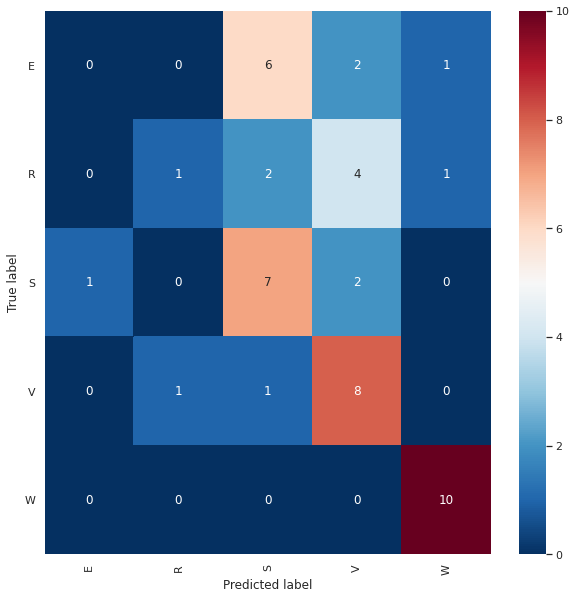

Normalised over true label (rows)


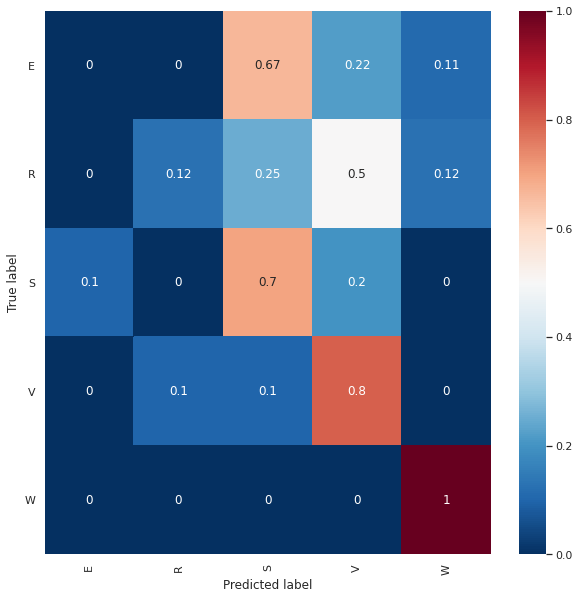

Normalised over pred label (columns)


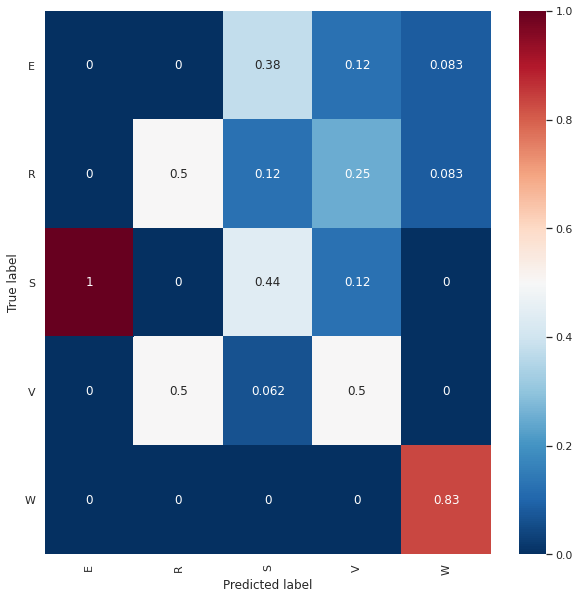

In [45]:
normalisation_methods = OrderedDict({None: '',
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(red_feat_flat_y_true, red_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=red_feat_flat_y_true, y_pred=red_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.show()

##### Comparison of original with reduced barrels dataset 

In [50]:
fixed_params_1 = ml.define_fixed_model_params(GaussianNB())
fixed_params_2 = ml.define_fixed_model_params(LogisticRegression())
params_1 = {**fixed_params_1, **all_feat_random_cv_searches['GaussianNB__no_balancing']['best_outer_loop_params']}
params_2 = {**fixed_params_2, **red_feat_random_cv_searches['15__tree__LogisticRegression__no_balancing']['best_outer_loop_params']}

F, p = ml.run_5x2_CV_paired_t_test(
    x=ml.x, y=ml.y, groups=ml.groups,
    selected_features_1=ml.features, selected_features_2=tree_top_barrels['Feature'].tolist()[:15],
    classifier_1=GaussianNB, classifier_2=LogisticRegression,
    params_1=params_1, params_2=params_2,
    resampling_method_1='no_balancing', resampling_method_2='no_balancing',
    n_components_pca_1=None, n_components_pca_2=None,
    scoring_func='accuracy'
)

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py

In [51]:
print(F, p)

1.859357972413363 0.25595201190221606


So, no significant difference in performance when reduce number of barrels from 46 to 15.